In [1]:
import umap
import math
import jupyter_fix
import warnings
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from tqdm import tqdm

jupyter_fix.fix_jupyter_path()
warnings.filterwarnings("ignore")

path = "../../data/encoded_data/5-10-25-50-75/"
TRIALS = 5

<h1><center> Loading data </h1></center>

In [2]:
emnist_preds = []
kuzushiji_preds = []

for trial in range(TRIALS):
    emnist_preds.append(np.load(path + "trial_" + str(trial) + "_emnist_preds.npz")['arr_0'])
    kuzushiji_preds.append(np.load(path + "trial_" + str(trial) + "_kuzushiji_preds.npz")['arr_0'])

In [3]:
for trial in range(TRIALS):
    print(len(emnist_preds[trial]), len(kuzushiji_preds[trial]))

13344 12064
11104 10752
11680 10592
12544 11200
12704 12928


<h1><center> UMAP </h1></center>

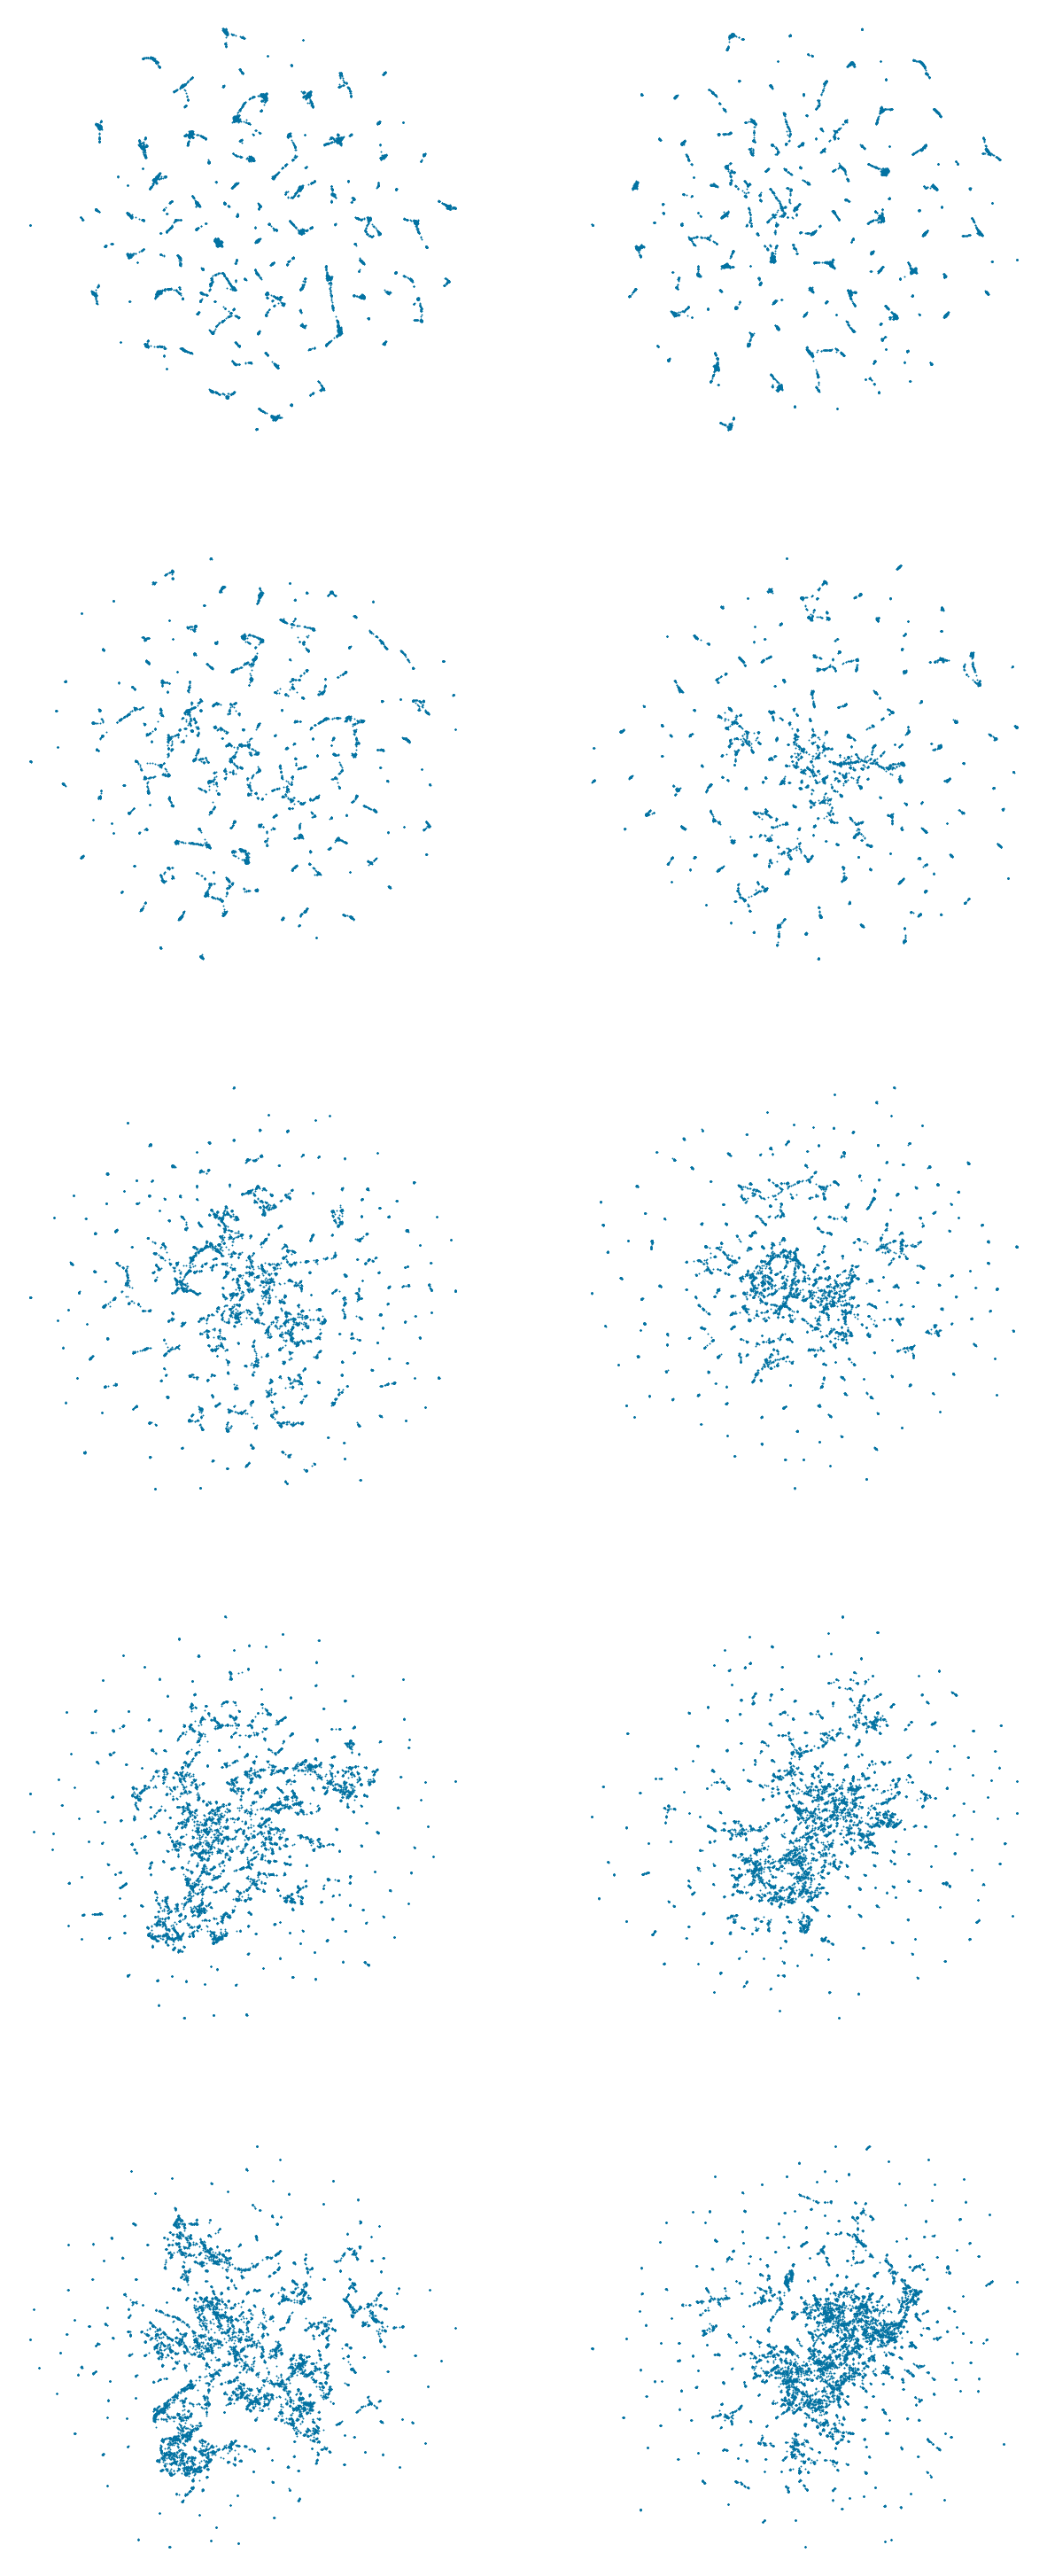

In [16]:
emnist_umap = []
kuzushiji_umap = []

plt.rcParams["figure.figsize"] = (15, 37.5)
fig = plt.figure(constrained_layout=False)
gs = gridspec.GridSpec(TRIALS, 2, figure=fig)

for pred in range(TRIALS):
    reducer_emnist = umap.UMAP(n_components=2)
    embedding_emnist = reducer_emnist.fit_transform(emnist_preds[pred])
    emnist_umap.append(embedding_emnist)

    reducer_kuzushiji = umap.UMAP(n_components=2)
    embedding_kuzushiji = reducer_kuzushiji.fit_transform(kuzushiji_preds[pred])
    kuzushiji_umap.append(embedding_kuzushiji)

    ax1 = fig.add_subplot(gs[pred, 0])
    ax2 = fig.add_subplot(gs[pred, 1])

    ax1.axis('off')
    ax2.axis('off')

    ax1.scatter(embedding_emnist[:, 0], embedding_emnist[:, 1], s=1)
    ax2.scatter(embedding_kuzushiji[:, 0], embedding_kuzushiji[:, 1], s=1)

plt.show()

<h1><center> TSNE </h1></center>

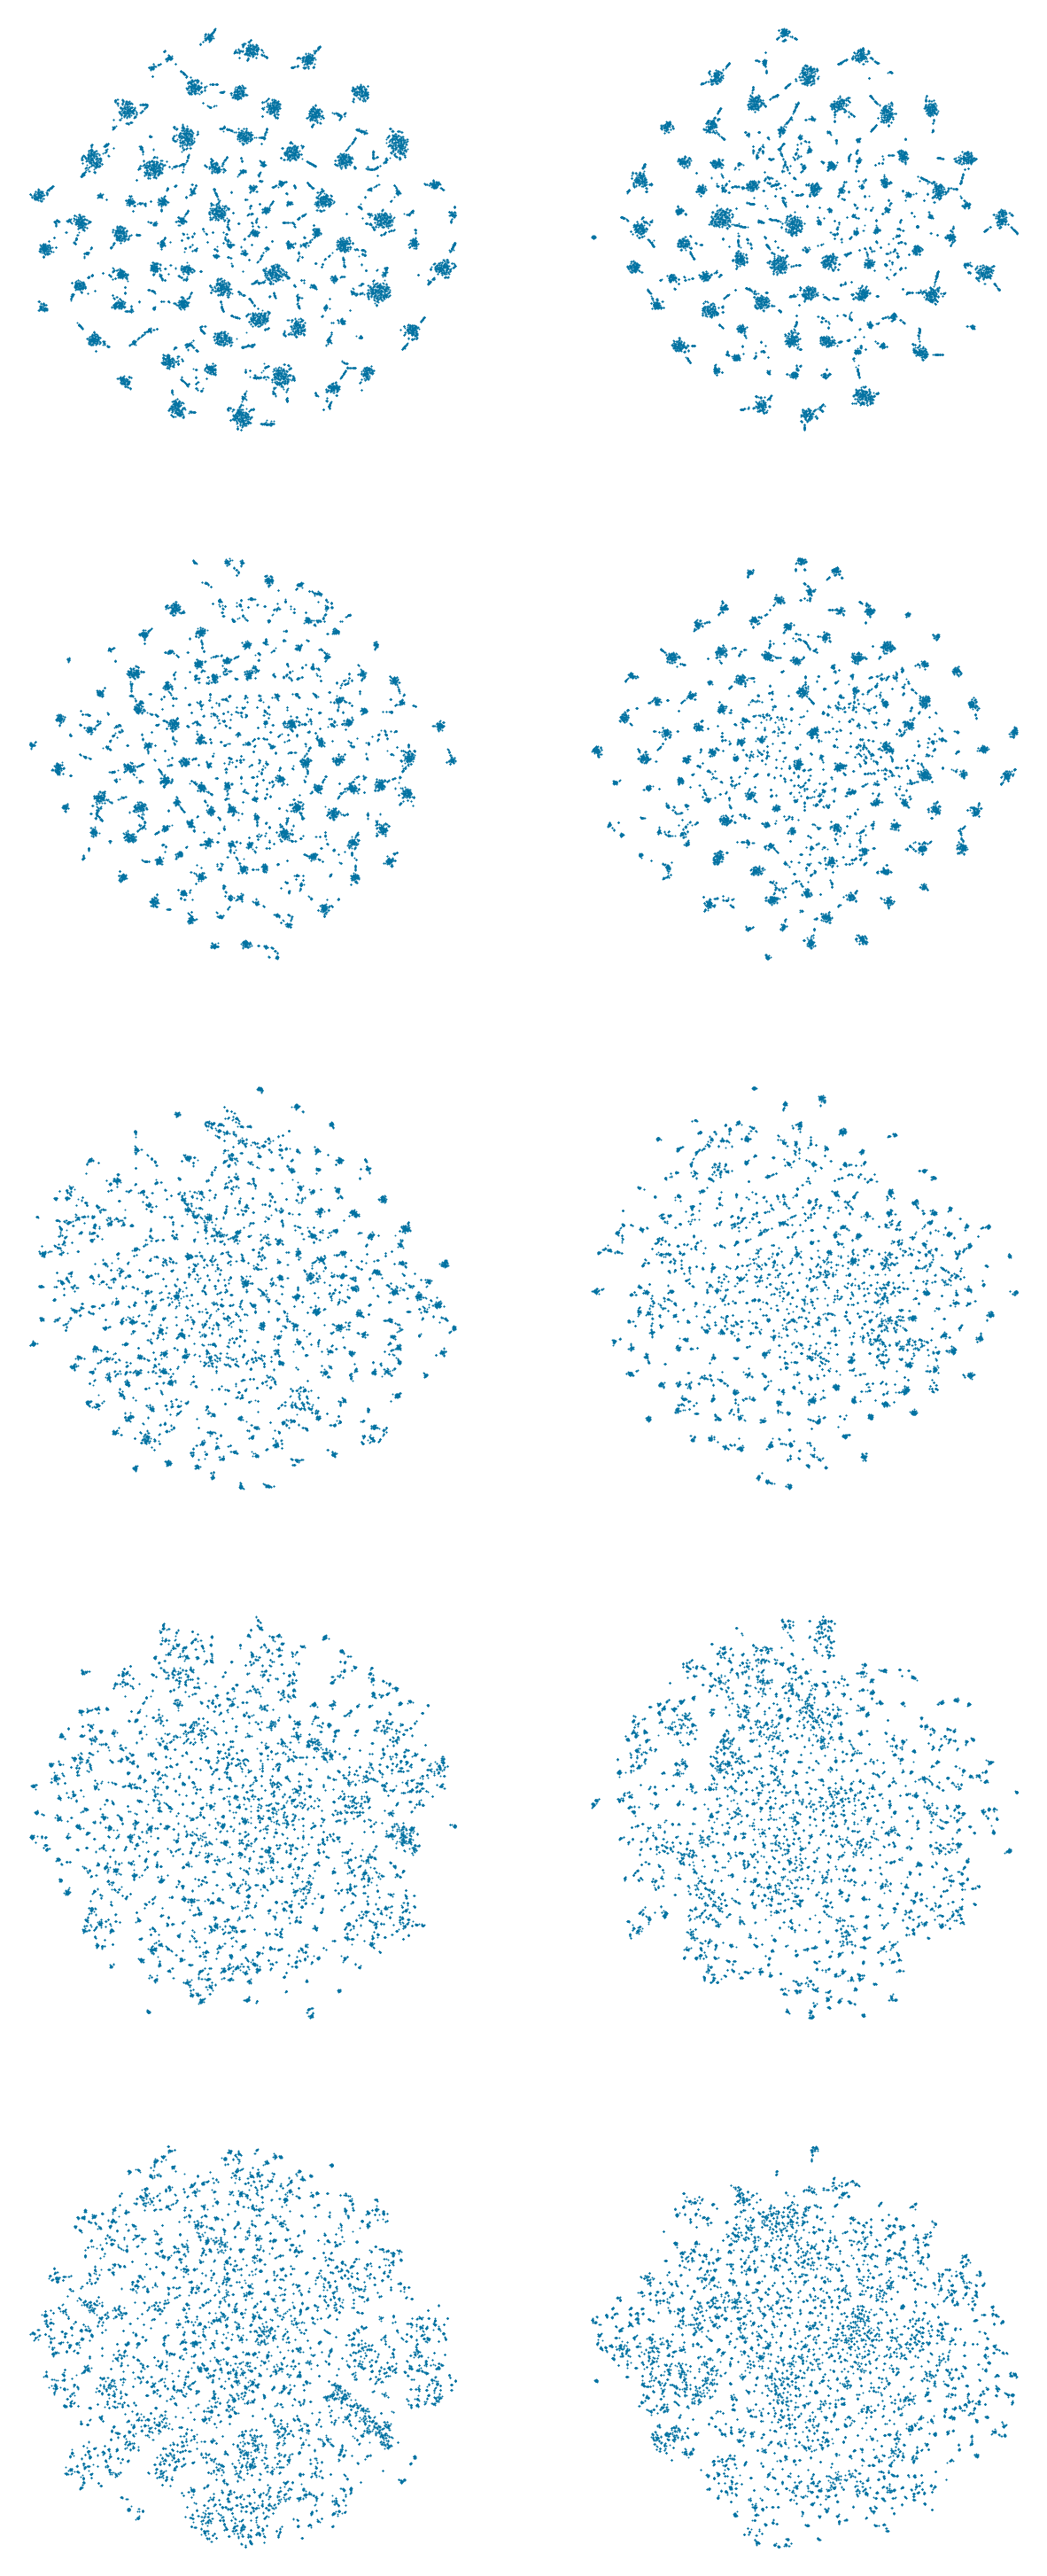

In [11]:
emnist_tsne = []
kuzushiji_tsne = []

plt.rcParams["figure.figsize"] = (15, 37.5)
fig = plt.figure(constrained_layout=False)
gs = gridspec.GridSpec(TRIALS, 2, figure=fig)

for pred in range(TRIALS):
    reducer_emnist = TSNE(n_components=2)
    embedding_emnist = reducer_emnist.fit_transform(emnist_preds[pred])
    emnist_tsne.append(embedding_emnist)

    reducer_kuzushiji = TSNE(n_components=2)
    embedding_kuzushiji = reducer_kuzushiji.fit_transform(kuzushiji_preds[pred])
    kuzushiji_tsne.append(embedding_kuzushiji)

    ax1 = fig.add_subplot(gs[pred, 0])
    ax2 = fig.add_subplot(gs[pred, 1])

    ax1.axis('off')
    ax2.axis('off')

    ax1.scatter(embedding_emnist[:, 0], embedding_emnist[:, 1], s=1)
    ax2.scatter(embedding_kuzushiji[:, 0], embedding_kuzushiji[:, 1], s=1)

plt.show()

<h1><center> MDS </h1></center>

In [5]:
emnist_mds_x = [[], [], [], [], []]
emnist_mds_y = [[], [], [], [], []]

kuzushiji_mds_x = [[], [], [], [], []]
kuzushiji_mds_y = [[], [], [], [], []]

emnist_preds_batched = [[], [], [], [], []]
kuzushiji_preds_batched = [[], [], [], [], []]

BATCH_SIZE = 1000
for dataset in range(TRIALS):
    for batch in range(math.ceil(len(emnist_preds[dataset])/BATCH_SIZE)):
        emnist_preds_batched[dataset].append(emnist_preds[dataset][batch*BATCH_SIZE:(batch+1)*BATCH_SIZE])

for dataset in range(TRIALS):
    for batch in range(math.ceil(len(kuzushiji_preds[dataset])/BATCH_SIZE)):
        kuzushiji_preds_batched[dataset].append(kuzushiji_preds[dataset][batch*BATCH_SIZE:(batch+1)*BATCH_SIZE])

for dataset in range(TRIALS):
    reducer_emnist = MDS(n_components=2, n_jobs=-1)
    for batch in tqdm(range(math.ceil(len(emnist_preds[dataset])/BATCH_SIZE))):
        embedding_emnist = reducer_emnist.fit_transform(emnist_preds_batched[dataset][batch])
        for sample in embedding_emnist:
            emnist_mds_x[dataset].append(sample[0])
            emnist_mds_y[dataset].append(sample[1])

for dataset in range(TRIALS):
    reducer_kuzushiji = MDS(n_components=2, n_jobs=-1)
    for batch in tqdm(range(math.ceil(len(kuzushiji_preds[dataset])/BATCH_SIZE))):
        embedding_kuzushiji = reducer_kuzushiji.fit_transform(kuzushiji_preds_batched[dataset][batch])
        for sample in embedding_kuzushiji:
            kuzushiji_mds_x[dataset].append(sample[0])
            kuzushiji_mds_y[dataset].append(sample[1])

100%|██████████| 13/13 [03:44<00:00, 17.24s/it]


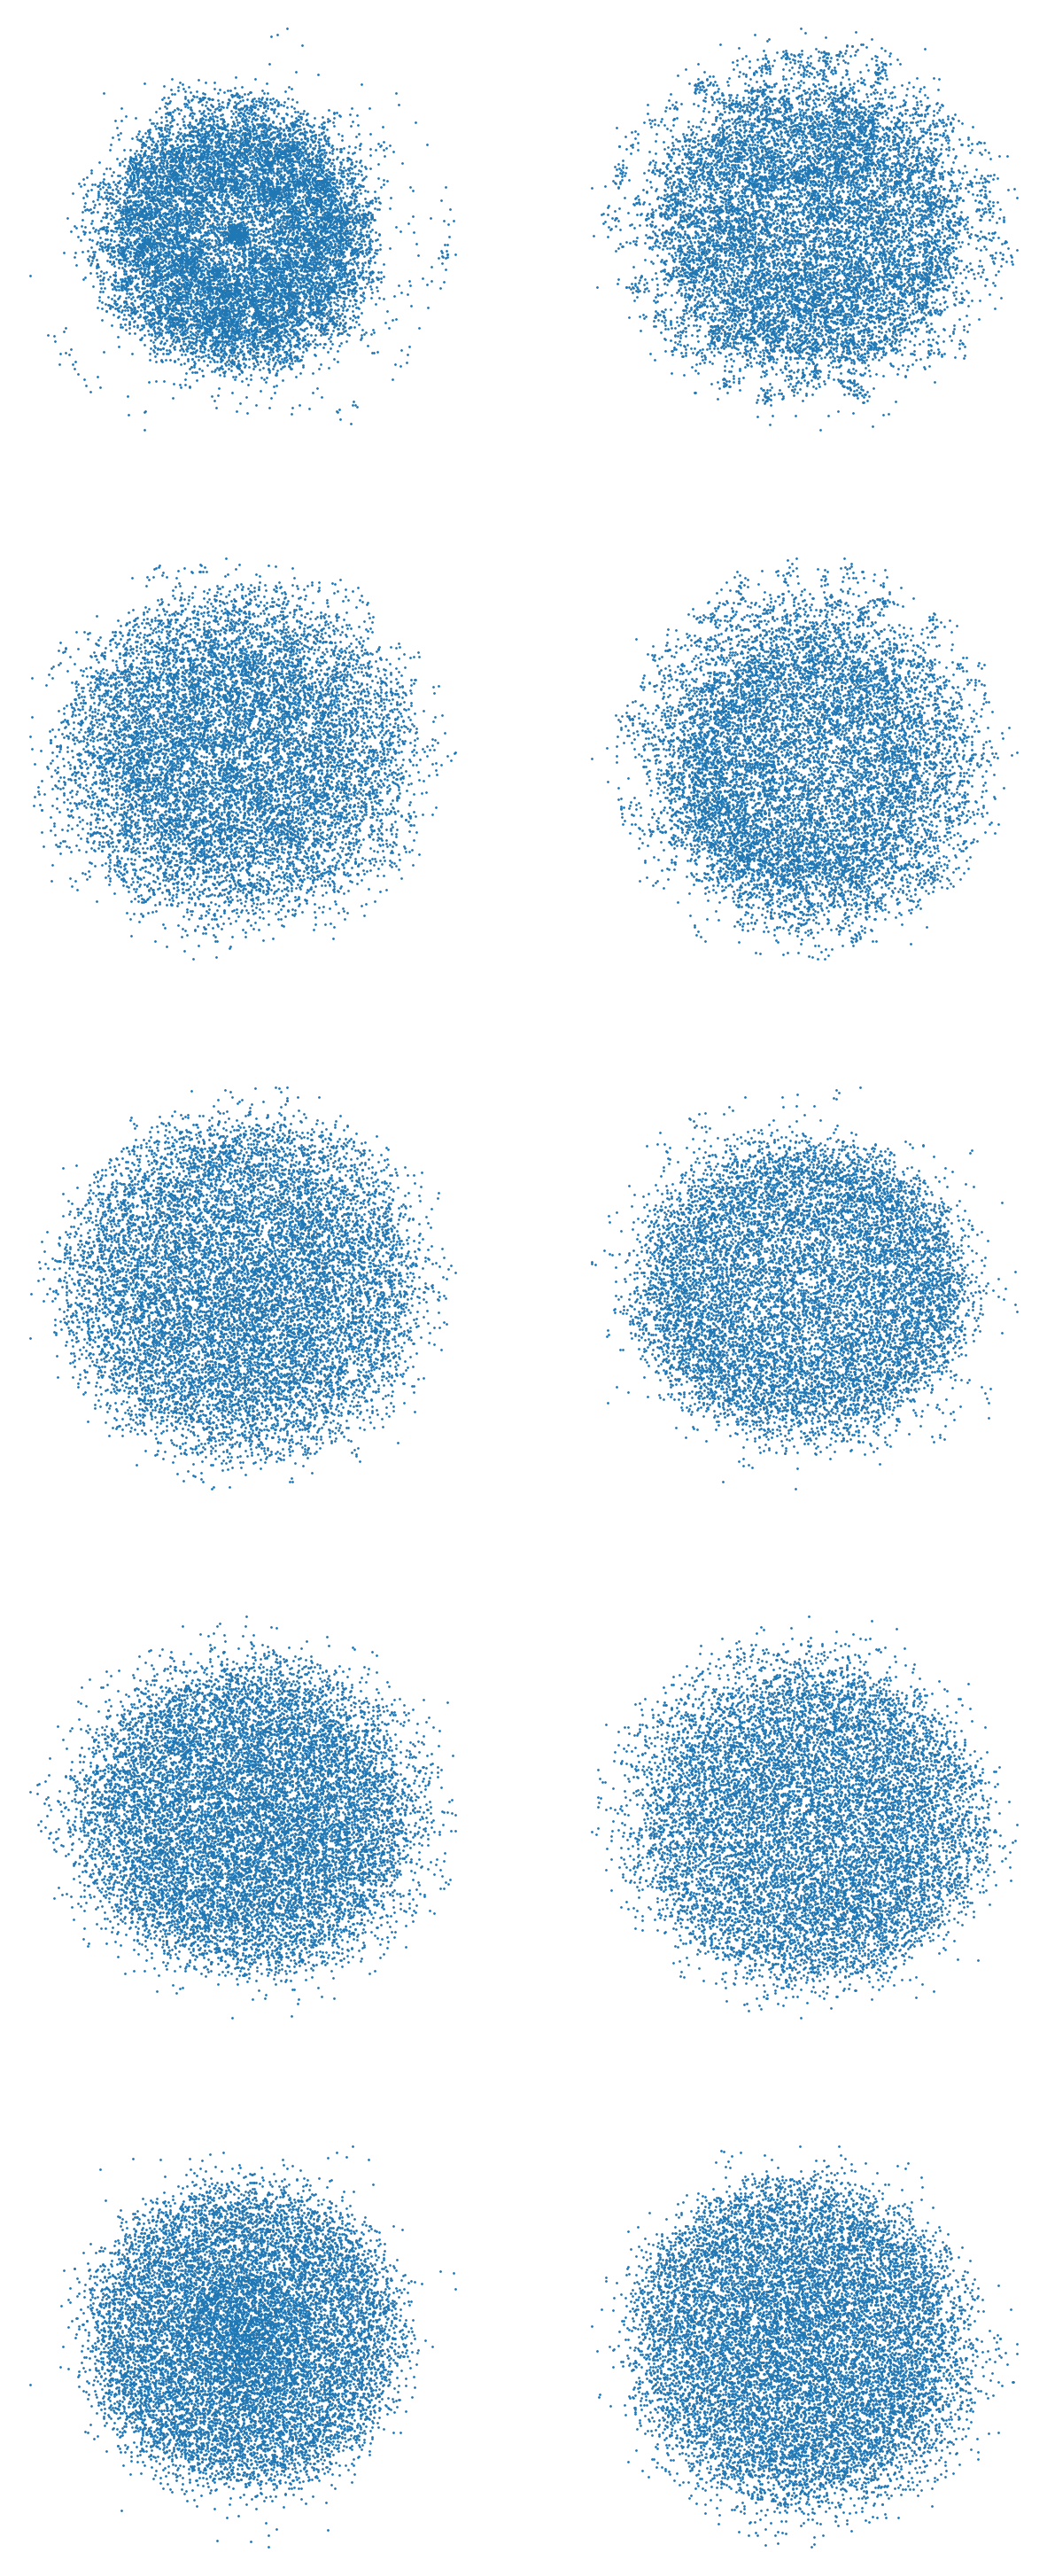

In [6]:
plt.rcParams["figure.figsize"] = (15, 37.5)
fig = plt.figure(constrained_layout=False)
gs = gridspec.GridSpec(TRIALS, 2, figure=fig)

for dataset in range(TRIALS):

    ax1 = fig.add_subplot(gs[dataset, 0])
    ax2 = fig.add_subplot(gs[dataset, 1])

    ax1.axis('off')
    ax2.axis('off')

    ax1.scatter(emnist_mds_x[dataset], emnist_mds_y[dataset], s=1)
    ax2.scatter(kuzushiji_mds_x[dataset], kuzushiji_mds_y[dataset], s=1)

plt.show()

<h1><center> PCA </h1></center>

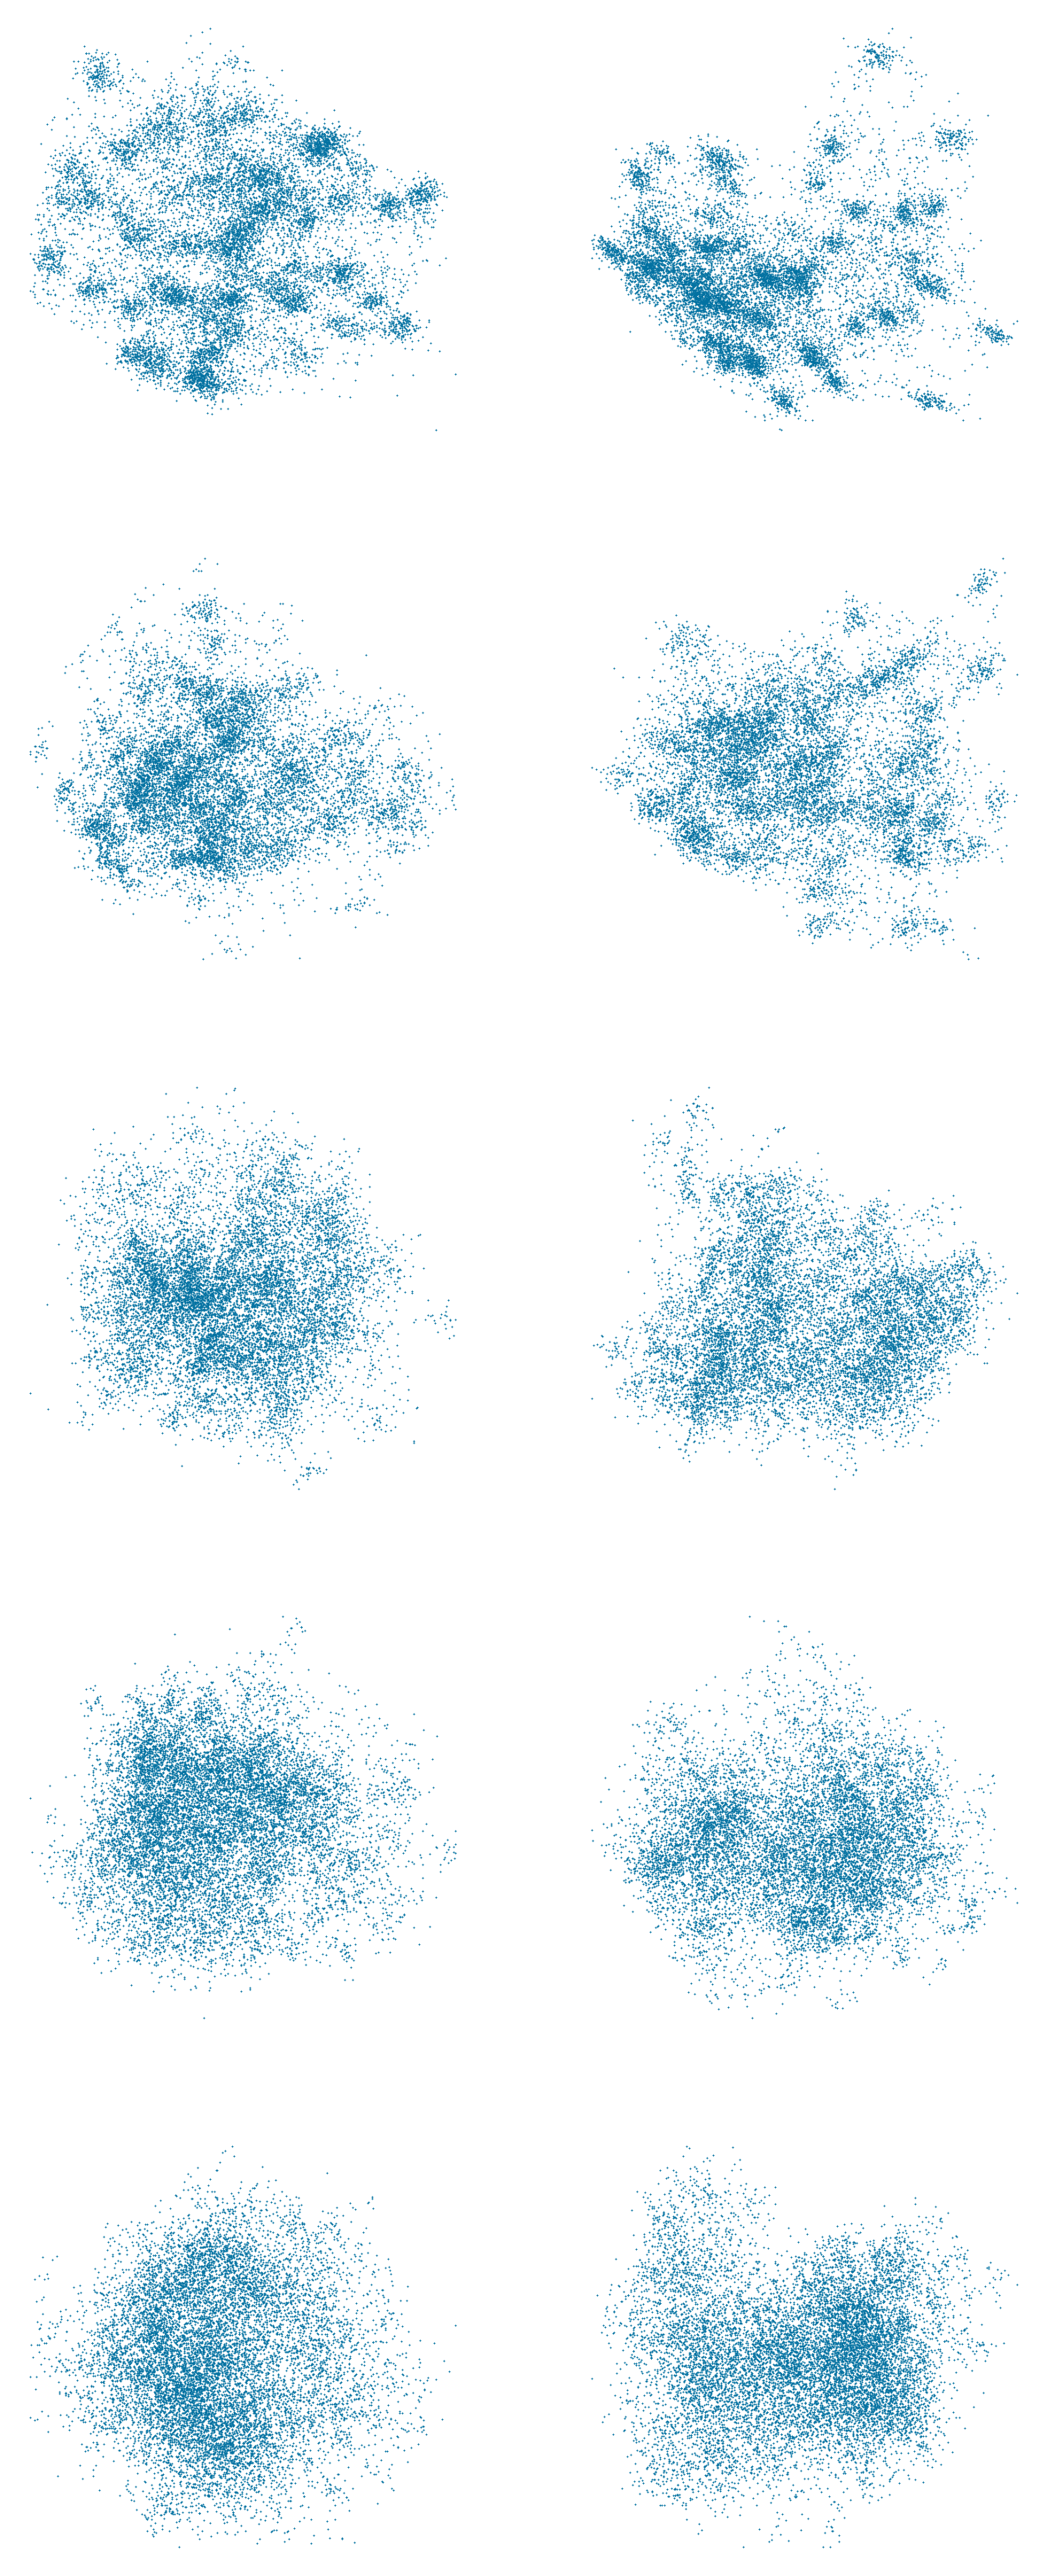

In [10]:
emnist_pca = []
kuzushiji_pca = []

plt.rcParams["figure.figsize"] = (15, 37.5)
fig = plt.figure(constrained_layout=False)
gs = gridspec.GridSpec(TRIALS, 2, figure=fig)

for pred in range(TRIALS):
    reducer_emnist = PCA(n_components=2)
    embedding_emnist = reducer_emnist.fit_transform(emnist_preds[pred])
    emnist_pca.append(embedding_emnist)

    reducer_kuzushiji = PCA(n_components=2)
    embedding_kuzushiji = reducer_kuzushiji.fit_transform(kuzushiji_preds[pred])
    kuzushiji_pca.append(embedding_kuzushiji)

    ax1 = fig.add_subplot(gs[pred, 0])
    ax2 = fig.add_subplot(gs[pred, 1])

    ax1.axis('off')
    ax2.axis('off')

    ax1.scatter(embedding_emnist[:, 0], embedding_emnist[:, 1], s=1)
    ax2.scatter(embedding_kuzushiji[:, 0], embedding_kuzushiji[:, 1], s=1)

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------